<a href="https://colab.research.google.com/github/eunShim/BigDataCapstone/blob/main/bigdatacapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV 파일 개수: 297915
⚠️ KT4/u691698.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u763740.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u425424.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u619830.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u663971.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u734962.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u696536.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u608297.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u817424.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u252209.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u163.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u288710.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u410701.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u739075.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u283722.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u460745.csv 불러오기 실패: Bad magic number for file header
⚠️ KT4/u4

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


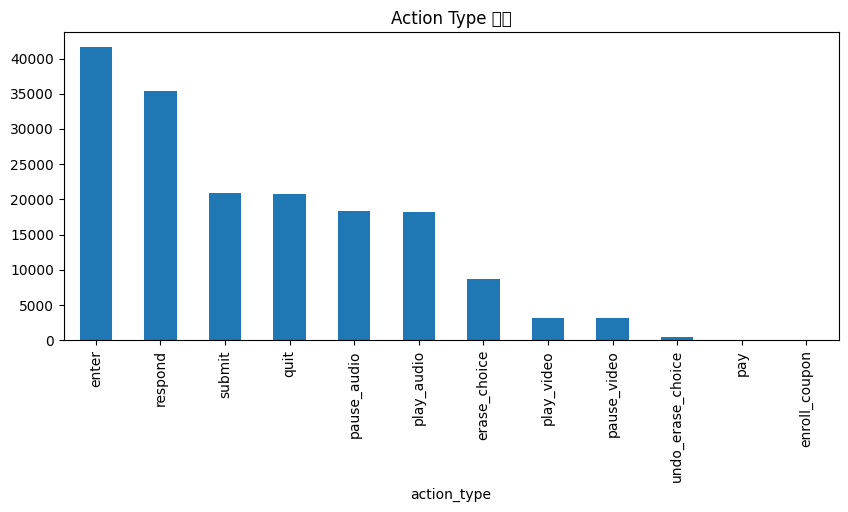


[Platform 분포]
platform
mobile    0.666905
web       0.333095
Name: proportion, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


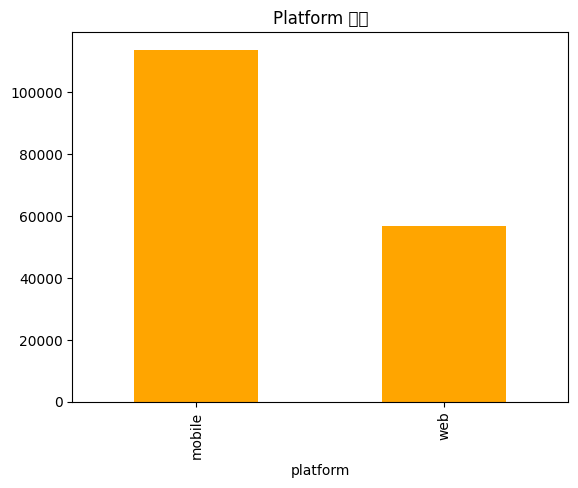


[Submit 로그 예시]
    user_id item_id user_answer
2   u317843   b4987         NaN
5   u317843   b3231         NaN
8   u317843   b2577         NaN
11  u317843   b4914         NaN
14  u317843   b3779         NaN

[Cursor Time 기초통계]
count     42856.000000
mean      26704.505063
std       53164.652230
min           0.000000
25%           0.000000
50%       11807.500000
75%       20750.000000
max      444034.000000
Name: cursor_time, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


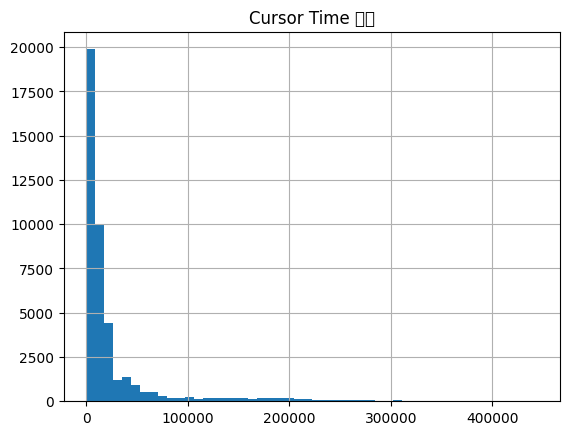


[Source 분포]
source
sprint            123792
my_note            15641
adaptive_offer     12192
diagnosis          10314
archive             3931
review_quiz         3317
tutor               1116
review               372
Name: count, dtype: int64

[사용자별 요약 통계]
       total_actions  unique_items   platforms
count     388.000000    388.000000  388.000000
mean      439.987113    151.438144    1.054124
std      1485.886284    476.763864    0.226554
min         3.000000      2.000000    1.000000
25%        22.000000     12.000000    1.000000
50%        32.000000     18.000000    1.000000
75%       129.000000     61.000000    1.000000
max     12063.000000   4725.000000    2.000000


In [13]:
import zipfile
import random
import pandas as pd
import matplotlib.pyplot as plt

# =======================================
# 1. ZIP 내부에서 사용자 샘플링 (예: 500명)
# =======================================
zip_path = "/content/EdNet-KT4.zip"
zf = zipfile.ZipFile(zip_path)

# CSV 파일 리스트 추출 (폴더 제외)
file_list = [f for f in zf.namelist() if f.endswith(".csv") and not f.endswith("/")]
print("CSV 파일 개수:", len(file_list))  # 대략 297,915

# --------------------------
# 2. 무작위로 500명 샘플링
# --------------------------
sample_files = random.sample(file_list, 500)

dfs = []
for f in sample_files:
    try:
        with zf.open(f) as fp:
            df = pd.read_csv(fp)
            df["user_id"] = f.split("/")[-1].replace(".csv","")  # 파일명에서 user_id 추출
            dfs.append(df)
    except Exception as e:
        print(f"⚠️ {f} 불러오기 실패:", e)

# 전체 500명 합치기
data = pd.concat(dfs, ignore_index=True)
print("샘플 데이터 크기:", data.shape)
print(data.head())

# =======================================
# 3. 변수별 경향성 분석
# =======================================

# (1) action_type 분포
print("\n[Action Type 분포]")
print(data["action_type"].value_counts(normalize=True))

data["action_type"].value_counts().plot(kind="bar", figsize=(10,4))
plt.title("Action Type 분포")
plt.show()

# (2) 플랫폼 분포
print("\n[Platform 분포]")
print(data["platform"].value_counts(normalize=True))

data["platform"].value_counts().plot(kind="bar", color="orange")
plt.title("Platform 분포")
plt.show()

# (3) 제출 로그만 확인 (submit)
submit_logs = data[data["action_type"]=="submit"].copy()
print("\n[Submit 로그 예시]")
print(submit_logs[["user_id","item_id","user_answer"]].head())

# (4) cursor_time (비디오/오디오 행동)
cursor_df = data[data["cursor_time"].notnull() & (data["cursor_time"]!="-")].copy()
cursor_df.loc[:, "cursor_time"] = pd.to_numeric(cursor_df["cursor_time"], errors="coerce")
print("\n[Cursor Time 기초통계]")
print(cursor_df["cursor_time"].describe())

cursor_df["cursor_time"].hist(bins=50)
plt.title("Cursor Time 분포")
plt.show()

# (5) source 분포
print("\n[Source 분포]")
print(data["source"].value_counts().head(20))

# =======================================
# 4. 사용자별 기본 통계
# =======================================
user_stats = data.groupby("user_id").agg(
    total_actions=("action_type","count"),
    unique_items=("item_id","nunique"),
    platforms=("platform","nunique")
)
print("\n[사용자별 요약 통계]")
print(user_stats.describe())
